<a href="https://colab.research.google.com/github/beatrizdfs/portfolio_projetos/blob/main/Estat%C3%ADstica_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação e Primeiros Passos (Setup)
Preparar o ambiente e entender a estrutura da nossa matéria-prima, a base de dados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# ler a minha base de dados
df = pd.read_csv("/content/drive/MyDrive/Aula Estatistica aplicada/dados.csv")

NameError: name 'pd' is not defined

In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media,USA
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media,USA
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media,AUS
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media,AUS
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133339 entries, 0 to 133338
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
 11  residencia_iso3  133337 non-null  object
dtypes: int64(3), object(9)
memory usage: 12.2+ MB


In [ ]:
# top 10 cargos
df["cargo"].value_counts().head(10)

,count
cargo,
Data Scientist,17311
Software Engineer,15006
Data Engineer,14868
Data Analyst,12381
Engineer,9454
Machine Learning Engineer,8203
Manager,6679
Analyst,4364
Research Scientist,3202


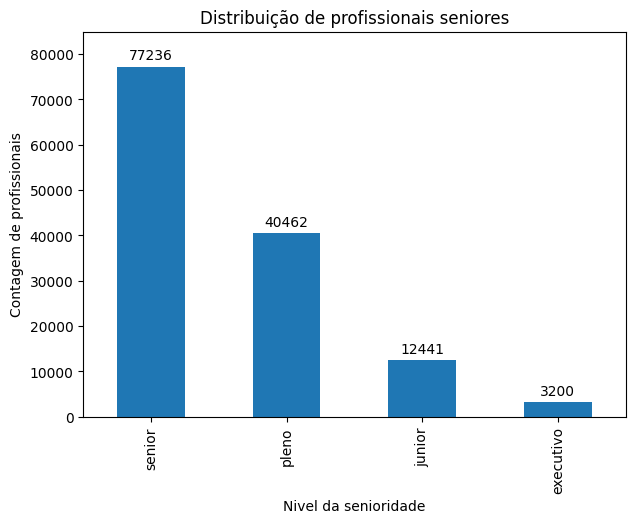

In [ ]:
senioridade = df["senioridade"].value_counts()

# Armazene o retorno do plot na variável 'ax' (eixo)
ax = senioridade.plot(kind='bar', figsize=(7,5))

# Adicione os rótulos acima das barras
ax.bar_label(ax.containers[0], padding=3)

# Descobre o valor máximo e define o limite do eixo Y um pouco acima
limite_superior = senioridade.max() * 1.1
ax.set_ylim(0, limite_superior)

senioridade.plot(kind='bar') # tipo do gráfico
plt.title("Distribuição de profissionais seniores")
plt.xlabel("Nivel da senioridade") # título do eixo x
plt.ylabel("Contagem de profissionais") # título do eixo y
plt.show() # mostra só a imagem, tira os escritos acima do gráfico

# Explorando a Realidade da Base
Antes de calcular, precisamos saber quem e o que está na base

In [ ]:
df

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media,USA
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media,USA
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media,AUS
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media,AUS
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
133334,2020,senior,integral,Data Scientist,412000,USD,412000,US,remoto,US,grande,USA
133335,2021,pleno,integral,Principal Data Scientist,151000,USD,151000,US,remoto,US,grande,USA
133336,2020,junior,integral,Data Scientist,105000,USD,105000,US,remoto,US,pequena,USA
133337,2020,junior,contrato,Business Data Analyst,100000,USD,100000,US,remoto,US,grande,USA


**O Centro dos Dados (Média, Mediana e a Decisão Certa)**
## Qual é o salário típico e qual medida (Média ou Mediana) devemos usar para representá-lo?


In [ ]:
df_atual = df[["ano", "senioridade", "cargo", "usd", "remoto"]]

In [ ]:
df_atual

,ano,senioridade,cargo,usd,remoto
0,2025,senior,Solutions Engineer,214000,remoto
1,2025,senior,Solutions Engineer,136000,remoto
2,2025,pleno,Data Engineer,158800,presencial
3,2025,pleno,Data Engineer,139200,presencial
4,2025,junior,Data Engineer,90000,presencial
...,...,...,...,...,...
133334,2020,senior,Data Scientist,412000,remoto
133335,2021,pleno,Principal Data Scientist,151000,remoto
133336,2020,junior,Data Scientist,105000,remoto
133337,2020,junior,Business Data Analyst,100000,remoto


In [ ]:
df["usd"].describe()

,usd
count,133339.000000
mean,157619.079339
std,74289.262933
min,15000.000000
25%,106000.000000
50%,146206.000000
75%,198000.000000
max,800000.000000


In [ ]:
mean_usd = df["usd"].mean()
mediana_usd = df["usd"].median()

print(mean_usd)
print(mediana_usd)

157619.07933912807
146206.0


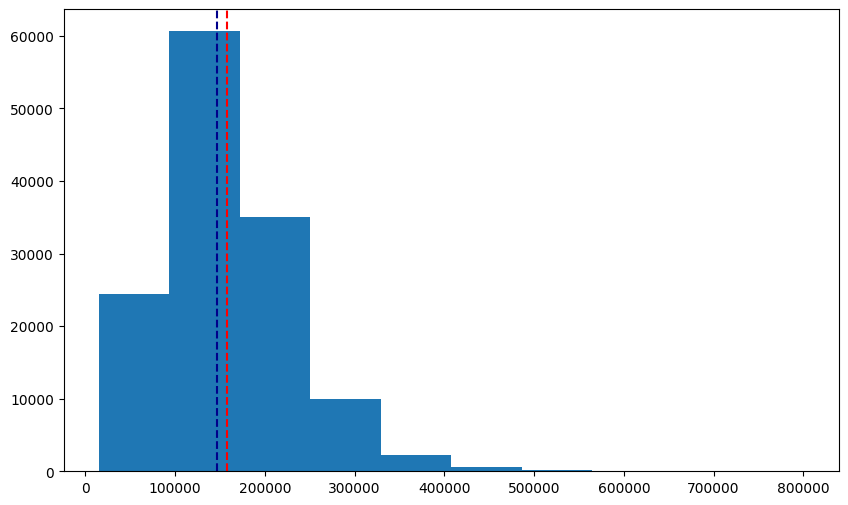

In [ ]:
from matplotlib.lines import lineStyles

plt.figure(figsize=(10,6))
plt.hist(df["usd"])

#adicionar linha mediana e media
plt.axvline(mean_usd, color = 'red', linestyle = 'dashed')
plt.axvline(mediana_usd, color = 'darkblue', linestyle = 'dashed')
plt.show()

# Salário vs. Senioridade